In [1]:
# !pip install spinesTS
import sys
sys.path.append('..')

# MLPTorchModel

In [2]:
from spinesTS.preprocessing import split_series
from sklearn.preprocessing import StandardScaler
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.pipeline import Pipeline

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import RecurrentWeightedDenseNet
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

Existing CSV file list: 
>> >> >> >> >> >> >> >> >> >> 
    Electric_Production
    Messages_Sent
    Messages_Sent_Hour
    Series_0
    Series_1
    Series_2
    Series_3
    Series_4
    Series_5
    Series_6
    Series_7
    Series_8
    Series_9
    Supermarket_Incoming
    Web_Sales
    __init__
<< << << << << << << << << << 


In [6]:
cs = series_data['Series_0']
cs_data = cs.dataset['turnover_1']
x_train_cs, x_test_cs, y_train_cs, y_test_cs = split_series(cs_data, cs_data, 420, 420, train_size=0.8)

## RecurrentWeightedDenseNet

### one res_dense_blocks

r2: -0.5831917759359726
mae: 83.89063441866921
mape: 0.6705349931175776


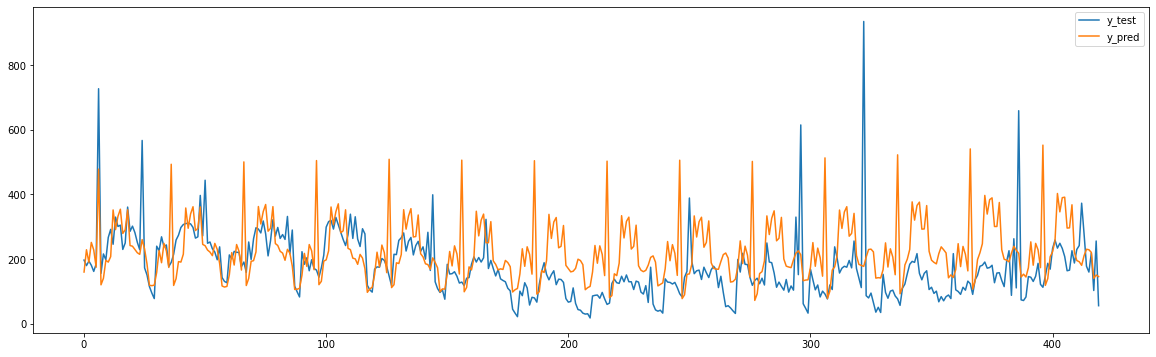

In [7]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=1, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### two res_dense_blocks

r2: -0.9631024142347212
mae: 91.58584717795962
mape: 0.7204733330717152


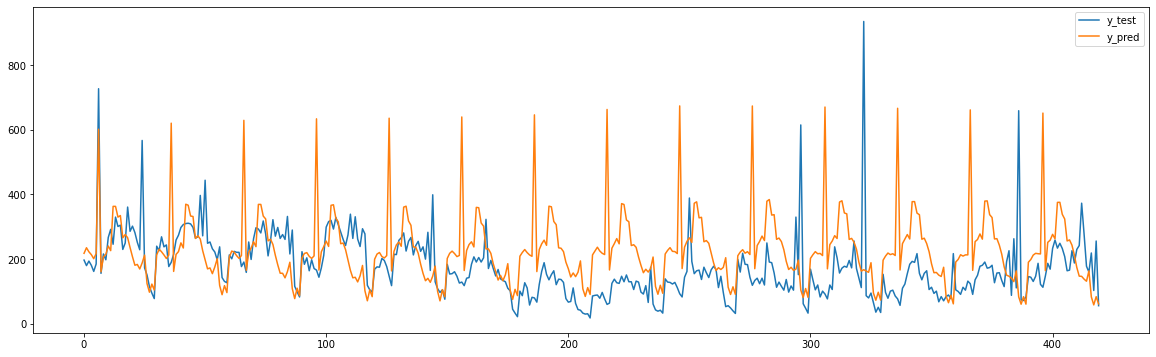

In [8]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=2, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### four res_dense_blocks

r2: -0.7024661308459873
mae: 88.35414064044045
mape: 0.7214534844837018


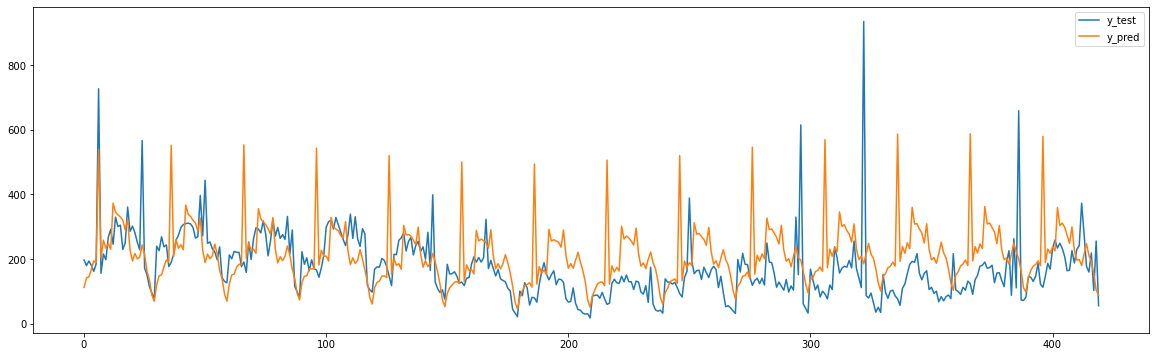

In [9]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=4, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### one res_dense_blocks with standard scaler

r2: -0.7512148786583465
mae: 93.32017397199358
mape: 0.7605703743009655


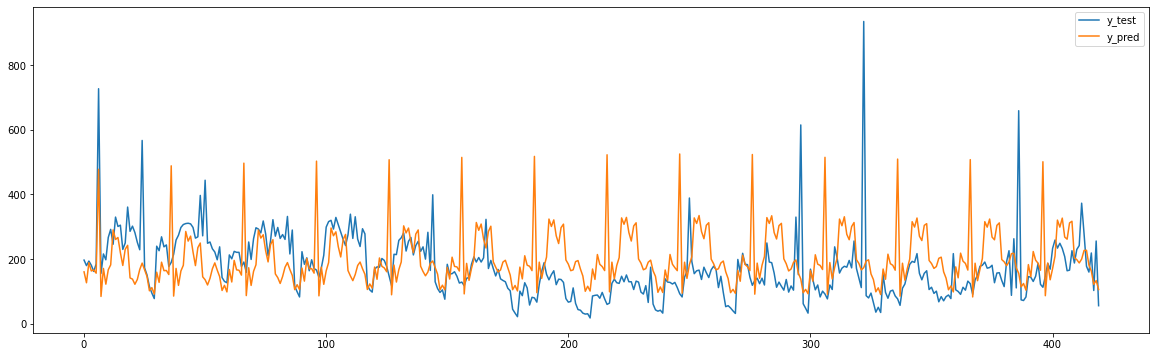

In [10]:
pp = Pipeline([
    ('sc', StandardScaler()),
    ('model', RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=1, learning_rate=0.001))
])

pp.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = pp.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: 0.43177702397035866
mae: 69.8984997692658
mape: 0.38500695461808654


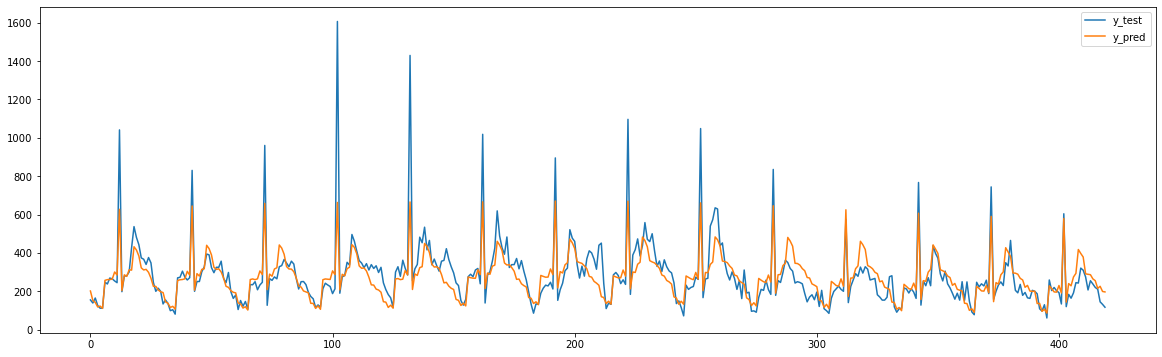

In [11]:
y_pred_cs = pp.predict(x_test_cs[:-2])
print(f"r2: {r2_score(y_test_cs[:-2].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[:-2], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[:-2], y_pred_cs)}")
plot2d(y_test_cs[:-2], y_pred_cs, fig_num_or_slice=slice(0, 1), labels=['y_test', 'y_pred'])